In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from funciones import label

In [2]:
directorio = os.getcwd()
directorio### Necesario estar en el directorio del programa

'/datos'

Cargando datos:

In [3]:
video_games = pd.read_csv(directorio+"//Video_Games_Sales_as_at_22_Dec_2016.csv")

In [4]:
video_games = pd.DataFrame(video_games)

A continuación vamos a revisar la columna de años para poder hacer una revisión de los datos a travéz del tiempo

In [37]:
type('Year_of_Release')

str

In [38]:
video_games['Year_of_Release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

Una vez que vemos que tenemos datos no concistenetes, eliminamos estos años:

In [6]:
video_games.dropna(subset=["Name","Year_of_Release"],inplace=True)
video_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

A continuación terminaremos volviendo estos datos a tipo entero:

In [39]:
video_games.Year_of_Release = video_games.Year_of_Release.astype(np.int64)

A continuación vamos a ver si podemos asumir que las ventas globales no son más que la suma de ventas segmentadas.

In [8]:
specific_sales = video_games['NA_Sales'] + video_games['EU_Sales'] + video_games['JP_Sales'] + video_games['Other_Sales']
Diference = video_games['Global_Sales'] - specific_sales
sum(Diference)

4.199999999999886

una vez revisada esta parte, podemos asumir que salvo por la suma de centavos, las ventas globales no son más que la suma de las ventas al rededor del mundo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


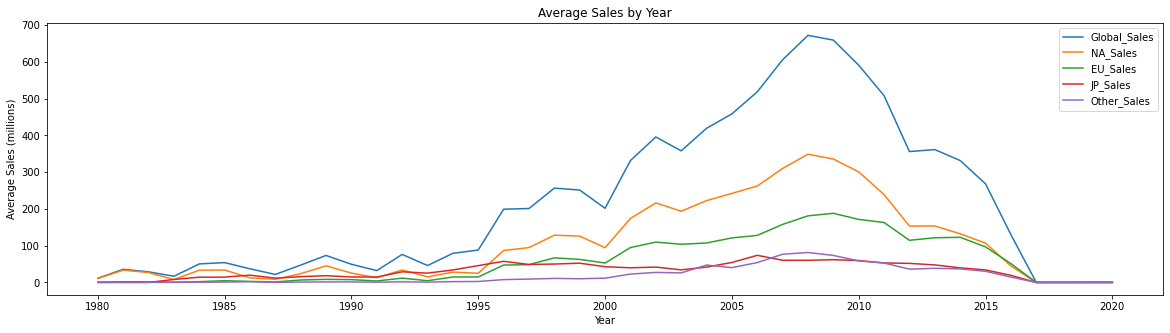

In [63]:
yearly_grouped = video_games.groupby(by="Year_of_Release")
all_sales_mean = (yearly_grouped['Global_Sales','NA_Sales','EU_Sales','JP_Sales',
                                 'Other_Sales']).sum().plot(figsize=(20,5))
plt.title('Average Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales (millions)')
plt.show()

Vemos que los años donde más se vendieron estos videojuegos fue después del año 2000 y preliminarmente al 2015

Ahora revisaremos como se comportan las ventas de videojuegos por el género o tipo de video juego

Text(0, 0.5, 'Global Sales')

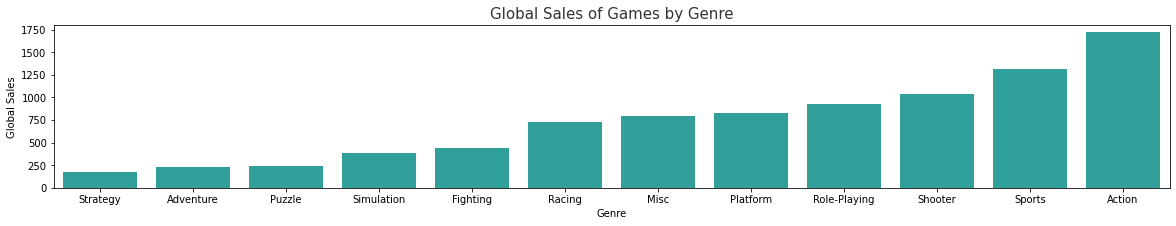

In [14]:
global_sales_by_genre = video_games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize = (20,3))
ax = sns.barplot(x = global_sales_by_genre.index, y = global_sales_by_genre.Global_Sales, color = 'lightseagreen')
ax.set_title('Global Sales of Games by Genre', size=15, alpha=0.8)
ax.set_xlabel('Genre', size = 10)
ax.set_ylabel('Global Sales', size=10)

Ventas por plataforma

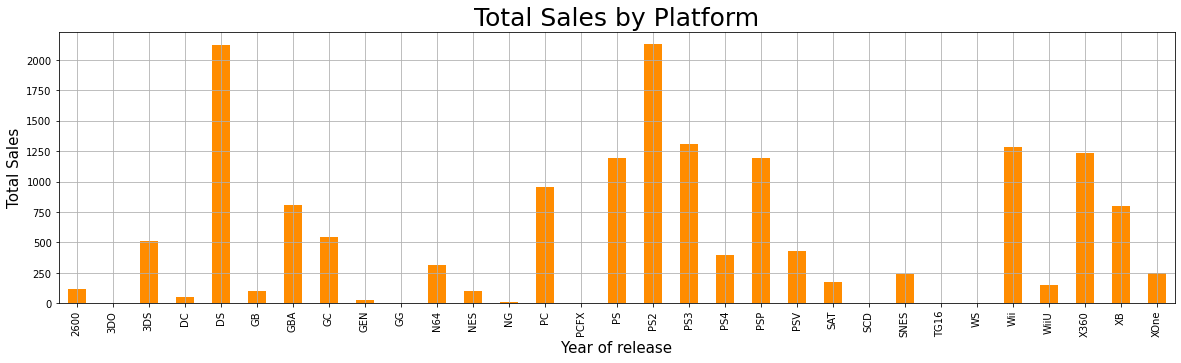

In [12]:
Platform_grouped = video_games.groupby(by = 'Platform')
total_sales = (Platform_grouped['Genre']).count().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkorange')
plt.title('Total Sales by Platform', size = 25)
plt.xlabel('Year of release', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se puede notar que las plataformas que más han vendido son PS2, DS y PS3. Una vez identificadas estas plataformas veamos si las ventas por plataformas tienen que ver con la empresa que los publica.

Text(0, 0.5, 'Sales')

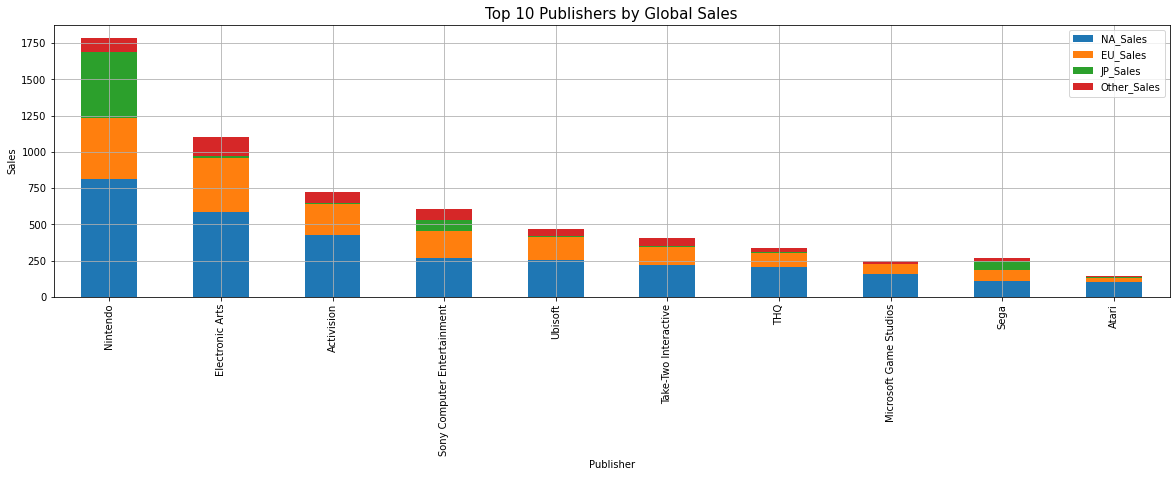

In [20]:
sales_publisher = video_games.pivot_table(index=['Publisher'], 
                                          values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                          aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
sales_publisher = sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True,figsize=(20,5))
ax.set_title('Top 10 Publishers by Global Sales', size=15)
ax.set_xlabel('Publisher', size=10, color='black')
ax.set_ylabel('Sales', size=10, color='Black')

La grafica anterior nos muestra el top 10 de ventas para las empresas.

Vamos a agrupar algunas plataformas con las comañías más conocidas.

In [18]:
platforms = {"Playstation": ["PS", "PS2", "PS3", "PS4"],
             "Xbox": ["XB", "X360", "XOne"],
             "PC": ["PC"],
             "Nintendo": ["Wii", "WiiU"],
             "Portable": ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

video_games["Grouped_Platform"] = video_games["Platform"].apply(lambda x: label(x, groups=platforms))
video_games["Grouped_Platform"]

0           Nintendo
1        Other_label
2           Nintendo
3           Nintendo
4           Portable
            ...     
16714    Playstation
16715           Xbox
16716       Portable
16717       Portable
16718       Portable
Name: Grouped_Platform, Length: 16448, dtype: object

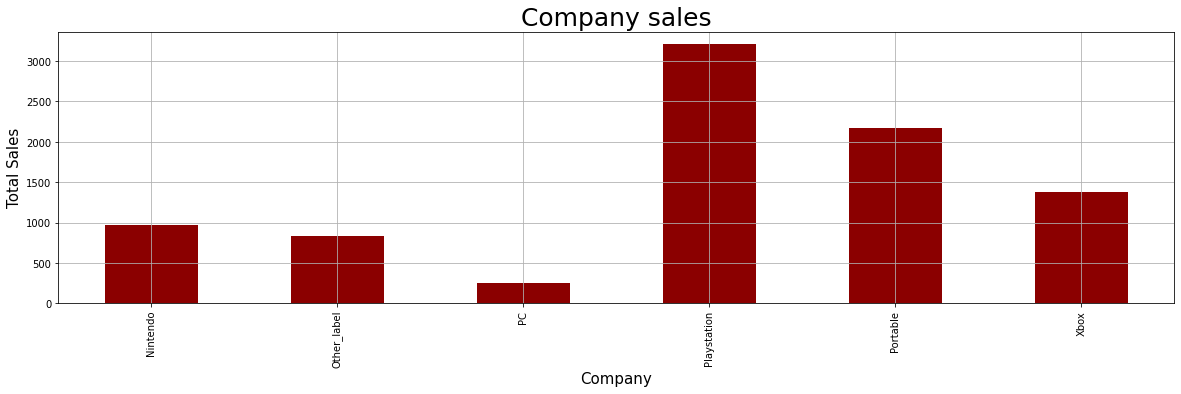

In [29]:
Platform_grouped = video_games.groupby(by = 'Grouped_Platform')
total_sales = (Platform_grouped['Global_Sales']).sum().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkred')
plt.title('Company sales', size = 25)
plt.xlabel('Company', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

A continuación observaremos los ratings y los scores

In [44]:
video_games.groupby(video_games['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Grouped_Platform
Rating,,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3922,3922,3922,3922,3921,3922,3922,3922,3922,3922,2756,2756,3887,2338,3922,3922
E10+,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393,1097,1097,1386,1026,1393,1393
EC,8,8,8,8,8,8,8,8,8,8,0,0,8,1,8,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3
M,1536,1536,1536,1536,1536,1536,1536,1536,1536,1536,1457,1457,1534,1492,1536,1536
RP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T,2905,2905,2905,2905,2904,2905,2905,2905,2905,2905,2589,2589,2887,2518,2905,2905


In [45]:
video_games[video_games['Rating'].isin(['AO','EC','K-A','RP'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Grouped_Platform
656,Theme Hospital,PC,1997,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40,NaN,NaN,9,90.0,Bullfrog Productions,K-A,PC
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO,Xbox
903,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A,Playstation
4297,Nickelodeon Team Umizoomi,DS,2011,Action,Take-Two Interactive,0.42,0.00,0.00,0.03,0.45,NaN,NaN,tbd,NaN,Black Lantern Studios,EC,Portable
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,Warner Bros. Interactive Entertainment,0.35,0.00,0.00,0.02,0.38,NaN,NaN,tbd,NaN,Black Lantern Studios,EC,Nintendo
6047,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,Warner Bros. Interactive Entertainment,0.27,0.00,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Black Lantern Studios,EC,Nintendo
6765,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,Global Star,0.12,0.09,0.00,0.03,0.24,NaN,NaN,7,4.0,Take-Two Interactive,EC,Playstation
7587,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,Take-Two Interactive,0.19,0.00,0.00,0.01,0.20,NaN,NaN,tbd,NaN,Take-Two Interactive,EC,Portable
9961,Dora the Explorer: Journey to the Purple Planet,GC,2005,Adventure,Global Star,0.09,0.02,0.00,0.00,0.12,NaN,NaN,tbd,NaN,Take-Two Interactive,EC,Portable
13066,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,Warner Bros. Interactive Entertainment,0.05,0.00,0.00,0.00,0.05,NaN,NaN,tbd,NaN,Black Lantern Studios,EC,PC


In [46]:
video_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [47]:
rating_group = video_games[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(video_games['Rating']).sum()
rating_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
AO,1.26,0.61,0.00,1.95,0.09
E,1274.51,703.87,197.96,2408.96,231.56
E10+,345.50,183.35,40.20,641.20,71.93
EC,1.53,0.11,0.00,1.78,0.11
K-A,2.56,0.27,1.46,4.33,0.03
M,742.89,480.00,63.58,1462.60,176.06
RP,0.00,0.03,0.00,0.03,0.01
T,747.60,421.79,150.70,1474.13,152.99


Text(0, 0.5, 'Total Global Sales')

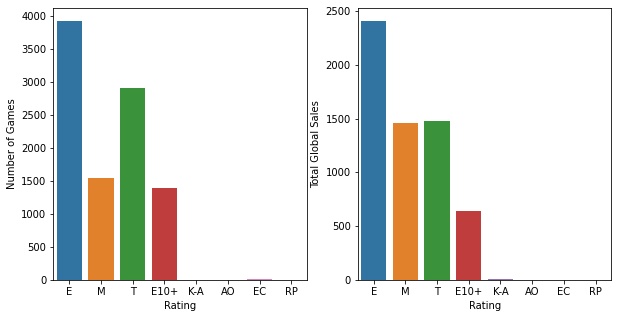

In [55]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=video_games, ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="Rating", y="Global_Sales",data=video_games, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales")

In [56]:
type(video_games['Critic_Score'])

pandas.core.series.Series

In [68]:
video_games.dropna(subset=["Name","Critic_Score"],inplace=True)
video_games['Critic_Score'].unique()
video_games.Critic_Score = video_games.Critic_Score.astype(np.int64)
type(video_games['Critic_Score'])

pandas.core.series.Series

In [69]:
video_games['Critic_Score']

0        76
2        82
3        80
6        89
7        58
         ..
16700    61
16701    53
16702    48
16706    60
16709    63
Name: Critic_Score, Length: 7983, dtype: int64

In [85]:
type(video_games['User_Score'])

pandas.core.series.Series

In [86]:
video_games['User_Score']

0          8
2        8.3
3          8
6        8.5
7        6.6
        ... 
16700    5.8
16701    tbd
16702    tbd
16706    7.2
16709    5.8
Name: User_Score, Length: 7950, dtype: object

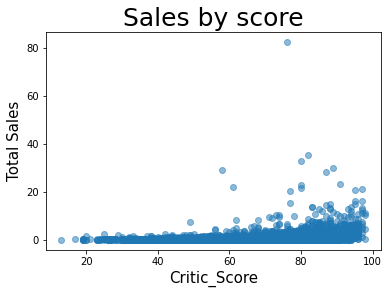

In [97]:
plt.scatter(video_games['Critic_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('Critic_Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Con la grafica anterior podemos ver que justo los video juegos con mejor score son los que tienen mejores ventas, algo que es intuitivo pensar.